<a href="https://colab.research.google.com/github/DarkFire414/RandomWalkSS/blob/main/RandomWalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa principal v1.1


		 Random walk, genere un número n de pasos aleatorios
	Ingrese el número de pasos a generar (número entero positivo) 

		 n = 500
	Ingrese la longitud L del paso (número decimal o entero positivo) 

		 L = 0.1

	 Guardando datos de la simulación en root/csv_file.csv

	 Distancia total recorrida, d = 12.4144

	 Se muestra el gráfico de la caminata, los pasos pueden verse distintos tamaños debido a la escala de cada eje...

	 Guardando imagen en root/plotImg.png


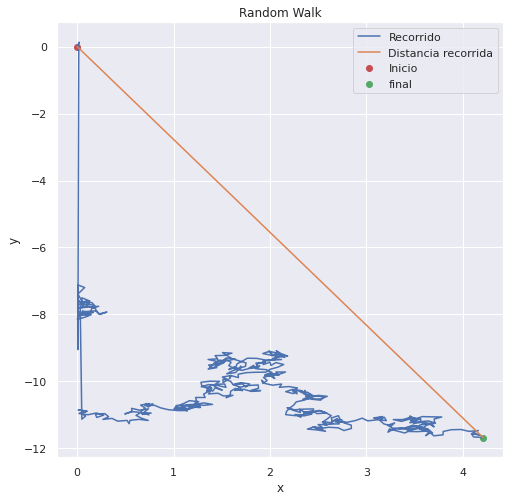

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv 

def saveToCSV(xdata, ydata):
  data = []

  headers = ["x", "y"]

  # open the file in the write mode
  f = open('csv_file', 'w', encoding='UTF8', newline='')

  # create the csv writer
  writer = csv.writer(f)

  # write a row to the csv file
  writer.writerow(headers)

  for i in range(len(xdata)):
    data.append([round(xdata[i], 4), round(ydata[i], 4)])
  
  writer.writerows(data)

  # close the file
  f.close()

def validPoint(px, py, dicc):
  def c1():
    return ((px>0) and (py>0))
  def c2():
    return ((px<0) and (py>0))
  def c3():
    return ((px<0) and (py<0))
  def c4():
    return ((px>0) and (py<0))
  funcs = {
      "I": c1,
      "II": c2,
      "III": c3,
      "IV": c4
  }
  for i in dicc:
    if (not dicc[i]):
      if (funcs[i]()):
        return False
  return True

def genNewPoint(L):
  theta = random.uniform(0, 2*np.pi)
  return [L * np.cos(theta), L * np.sin(theta)]

#@title Cuadrantes permitidos
C_I = True #@param {type: "boolean"}
C_II = False #@param {type: "boolean"}
C_III = False #@param {type: "boolean"}
C_IV = True #@param {type: "boolean"}
dicc = {
    "I": C_I, 
    "II": C_II,
    "III": C_III,
    "IV": C_IV,
}

print("\n\t\t Random walk, genere un número n de pasos aleatorios")

while True:
    try:
        # Pasos de la caminata
        n = int(input("\tIngrese el número de pasos a generar (número entero positivo) \n\n\t\t n = "))
        
        if n<0:
            print("\n\tDebe ingresarse un número positivo, intente nuevamente")
            continue
        
        # Longitud del paso
        L = float(input("\tIngrese la longitud L del paso (número decimal o entero positivo) \n\n\t\t L = "))
        
        if L<0:
            print("\n\tDebe ingresarse un número positivo, intente nuevamente")
            continue
        break
   
    except:
        print("\n\tOcurrió un error al guardar la información, intente nuevamente")    

# Coordenadas
xs = [0]
ys = [0]

tmpx, tmpy = 0, 0

for i in range(1, n+1, 1):
    while(1):
      point = genNewPoint(L)
      tmpx = tmpx + point[0]
      tmpy = tmpy + point[1]
      if (validPoint(tmpx, tmpy, dicc)):
        break  
      else:
        continue

    xs.append(tmpx)
    ys.append(tmpy)
    tmpx = xs[i]
    tmpy = ys[i]
    
    #print("\n\n\tPaso " + str(i) + " - \tx = " + str( round(xs[i], 4) ) + "\t\t y = " + str( round(ys[i], 4) ) )
try:
  print("\n\t Guardando datos de la simulación en root/csv_file.csv")
  saveToCSV(xs, ys)
except:
  print("\n\t Ocurrió un error al guardar los datos")

d = pow( pow(xs[-1], 2) + pow(ys[-1], 2), 0.5)
print("\n\t Distancia total recorrida, d = " + str(round(d, 4)))

print("\n\t Se muestra el gráfico de la caminata, los pasos pueden verse distintos tamaños debido a la escala de cada eje...")

sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(8, 8)}) #width=8, height=4
plt.plot(xs, ys)
plt.plot( [xs[0], xs[-1]] , [ys[0], ys[-1]])
plt.scatter( xs[0] , ys[0]  , c = 'r')
plt.scatter( xs[-1], ys[-1] , c = 'g' )
plt.legend( ['Recorrido', 'Distancia recorrida', 'Inicio', 'final'] )
plt.title('Random Walk')
plt.xlabel('x')
plt.ylabel('y')
#plt.grid()

try:
  print("\n\t Guardando imagen en root/plotImg.png")
  plt.savefig('plotImg.png', dpi=100)
except:
  print("\n\t Ocurrió un error al guardar la imagen")

plt.show()



# Desarrollo de interfaz gráfica (Ipywidgets) v2.0

Doc: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

## Librería ipympl
-> "ipympl enables using the interactive features of matplotlib in Jupyter Notebooks, Jupyter Lab, Google Colab, VSCode notebooks, Google Colab"
Doc: https://matplotlib.org/ipympl/

In [7]:
!pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Uso de widgets externos
Se requiere habilitar el uso de widgets externos para utilizar las funciones interactivas de las gráficas matplotlib y que no se generen solo como imágenes png estáticas.
**Ejecute el código para habilitar**

In [1]:
# Habilitar
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Desabilitar
from google.colab import output
output.enable_custom_widget_manager()

## Programa principal
Ejecute el siguiente código y llame la función App()

In [4]:
# Gráficas interactivas
%matplotlib widget  
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from IPython import display
import csv 
import json

#Variables de simulación -------------------------------------------------------
projectName = 'Project_Name'

def setProjectName(newName):
  global projectName
  projectName = newName

def getProjectName():
  return projectName

# Coordenadas
xs = [0]
ys = [0]

def getxs():
  return xs

def getys():
  return ys

stepNum = 1  
lenght = 0.1 

def setStepNum(n):
  global stepNum
  stepNum = n.new
  #print(stepNum)

def getStepNum():
  return stepNum
  
def setLenght(L):
  global lenght
  lenght = L.new
  #print(L.new)

def getLenght():
  return lenght

dicc = {  #Cuadrantes
    "I": True, 
    "II": True,
    "III": True,
    "IV": True
}

def getDicc():
  return dicc

def setI(val):
  global dicc
  dicc['I'] = val.new
  #print(dicc)

def setII(val):
  global dicc
  dicc['II'] = val.new
  #print(dicc)

def setIII(val):
  global dicc
  dicc['III'] = val.new
  #print(dicc)

def setIV(val):
  global dicc
  dicc['IV'] = val.new
  #print(dicc)

#Simulacion --------------------------------------------------------------------
def validPoint(px, py, dicc):
  """
  Comprueba que el punto generado esté en alguno de los cuadrantes 
  permitidos.
  Arguments:
      px: Posición en x
      py: Posición en y
      dicc: Diccionario con los cudrantes permitidos -> {"I": True, etc..}
  Returns:
      True: El punto se encuentra en uno de los cuadrantes permitidos
      False: El punto está en algún cuadrante no permitido 
  """
  def c1():
    return ((px>0) and (py>0))
  def c2():
    return ((px<0) and (py>0))
  def c3():
    return ((px<0) and (py<0))
  def c4():
    return ((px>0) and (py<0))
  funcs = {
      "I": c1,
      "II": c2,
      "III": c3,
      "IV": c4
  }
  for i in dicc:
    if (not dicc[i]):
      if (funcs[i]()):
        return False
  return True

def genNewPoint(L):
  theta = random.uniform(0, 2*np.pi)
  return [L * np.cos(theta), L * np.sin(theta)]

def simulate(n, L):
  """
  Realiza la simulación Random walk con las siguientes condiciones:
  -El movimiento está restringido a los cuadrantes que permita el usuario
  Arguments:
      n: Número de pasos a generar (int+)
      L: Longitud del paso (float+)
  Returns:
      [xs, ys]: 
        xs > Arreglo con las coordenadas en x de cada paso
        ys > Arreglo con las coordenadas en y de cada paso 
  """
  # Coordenadas
  xs = [0]
  ys = [0]

  tmpx, tmpy = 0, 0

  for i in range(1, n+1, 1):
      while(1):
        point = genNewPoint(L)
        tmpx = tmpx + point[0]
        tmpy = tmpy + point[1]
        if (validPoint(tmpx, tmpy, dicc)):
          break  
        else:
          continue

      xs.append(tmpx)
      ys.append(tmpy)
      tmpx = xs[i]
      tmpy = ys[i]
      
      #print("\n\n\tPaso " + str(i) + " - \tx = " + str( round(xs[i], 4) ) + "\t\t y = " + str( round(ys[i], 4) ) )
  
  return [xs, ys]

#Widgets -----------------------------------------------------------------------

Title = widgets.HTML(
          value="<h1> Random walk </h1>"
)

def ConditionsTab():
  # Adquisición de número de pasos y longitud ----------------------------------
  
  numIntText = widgets.IntText(
                  value = 1,
                  description = 'Número',
                  disabled = False,
                  continuous_update = False,  # El widget se actualiza hasta que el 
                                              # mouse se suelta
                  step = 1
              )
  
  numIntText.observe(setStepNum, 'value')

  StepNum = widgets.VBox(
      [
          widgets.HTML(
              value = "<p> Cantidad de pasos a generar: </p>"
          ),
          numIntText
      ]
  )

  lenFloatText = widgets.FloatText(
                    value = 0.1,
                    description = 'Longitud',
                    disabled = False,
                    continuous_update = False,
                    step = 0.1
                )
  
  lenFloatText.observe(setLenght, 'value')

  StepLen = widgets.VBox(
      [
          widgets.HTML(
              value = "<p> Longitud del paso: </p>"
          ),
          lenFloatText
      ]
  )

  #Restricción de cuadrantes ---------------------------------------------------

  checkI = widgets.Checkbox(value=True, description='C I', disabled=False, indent=True)
  checkI.observe(setI, 'value')
  
  checkII = widgets.Checkbox(value=True, description='C II', disabled=False, indent=True)
  checkII.observe(setII, 'value')

  checkIII = widgets.Checkbox(value=True, description='C III', disabled=False, indent=True)
  checkIII.observe(setIII, 'value')
  
  checkIV = widgets.Checkbox(value=True, description='C IV', disabled=False, indent=True)
  checkIV.observe(setIV, 'value')

  QuadsAllowed = widgets.VBox(
      [
          widgets.HTML(
              value = "<p> Cuadrantes permitidos: </p>"
          ),
          widgets.VBox([ checkI, checkII, checkIII, checkIV ])
      ]
  )

  return widgets.VBox(
        [
            widgets.HTML(
              value = "<h2> Establezca las condiciones iniciales </h2>"
            ),
        
            widgets.HBox([StepNum, StepLen]),
        
            QuadsAllowed
        ]
    )

def SimTab():

  # default line color
  initial_color = '#FF00DD'

  out = widgets.Output()

  with out:
    sns.set_theme(style="darkgrid")
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
    plt.show()  

  # move the toolbar to the bottom
  fig.canvas.toolbar_position = 'bottom'
  ax.grid(True)    
  line, = ax.plot([], [], initial_color)

  def update(b):
    global xs
    global ys

    xs, ys = simulate(getStepNum(), getLenght())
    line.set_data(xs, ys)
    ax.set_xlim(0.95*min(xs), 1.05*max(xs))
    ax.set_ylim(0.95*min(ys), 1.05*max(ys)) 
    fig.canvas.draw()

  startButton = widgets.Button(
                      description='Iniciar',
                      disabled=False,
                      button_style='', # 'success', 'info', 'warning', 'danger' or ''
                      tooltip='Click me',
                      icon='check' #Fonts awesome
                  )

  startButton.on_click(update)

  return (
      widgets.VBox(
          [
              widgets.HTML(
                  value = "<h2> Inicie la simulación </h2>"
              ),
              startButton,
              out
          ]
      )
  )

def saveToCSV(xdata, ydata, name):
  data = []

  headers = ["x", "y"]

  # open the file in the write mode
  f = open(name + '.csv', 'w', encoding='UTF8', newline='')

  # create the csv writer
  writer = csv.writer(f)

  # write a row to the csv file
  writer.writerow(headers)

  for i in range(len(xdata)):
    data.append([round(xdata[i], 4), round(ydata[i], 4)])
  
  writer.writerows(data)

  # close the file
  f.close()

def saveConfigFile():
  # Data to be written
  dictionary = {
      "projectName": getProjectName(),
      "stepNum": getStepNum(),
      "lenght": getLenght(),
      "quadsAllowed": getDicc()
  }
  
  # Serializing json
  json_object = json.dumps(dictionary, indent=4)
  
  # Writing to .json
  with open(projectName + "_config_file.json", "w") as outfile:
      outfile.write(json_object)

def SaveTab():
  projectNameW = widgets.Text(
      value='Project_Name',
      placeholder='Ingrese el nombre del proyecto',
      description='Nombre: ',
      disabled=False,
      continuous_update=False
  )

  def setNewText(change):
    setProjectName(change.new)

  projectNameW.observe(setNewText, 'value')

  saveButton = widgets.Button(
                      description='Guardar',
                      disabled=False,
                      button_style='', # 'success', 'info', 'warning', 'danger' or ''
                      tooltip='Click me',
                      icon='cloud' #Fonts awesome
                  )
  
  def saveFiles(b):
    saveToCSV(getxs(), getys(), getProjectName())
    saveConfigFile()
    plt.savefig(getProjectName() + '_plotImg.png', dpi=100)

  saveButton.on_click(saveFiles)

  return (
      widgets.VBox(
          [
              widgets.HTML(
                  value = "<h2> Guarde los datos de la simulación </h2>"
              ),
              widgets.HTML(
                  value = "<p> Ingrese un nombre para el proyecto </p>"  
              ),
              projectNameW,
              saveButton
          ]
      )
  )

def App():
  return widgets.VBox([
      Title,
      ConditionsTab(),
      SimTab(),
      SaveTab()
  ])

In [5]:
App()